In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython.display import clear_output

#Ruta raiz
PATH = '/content/drive/My Drive/concurso'

#Ruta datos de entrada
INPATH = PATH + '/input'
#Ruta datos de salida
OUTPATH = PATH + '/target'
#Ruta de checkpoints
CKPATH = PATH + '/checkpoints'

imgurls = !ls -1 '{INPATH}'

In [0]:
#Particionando imagenes segun angulo de luz
#Creando urls up center
ucurls = []
for i in range(15):
  for n in range(0, 20):
    ucurls.append(str(i).zfill(4)+'_cara_'+str(n).zfill(4)+'.jpg')
#Creando urls up left
ulurls = []
for i in range(15):
  for n in range(20, 40):
    ulurls.append(str(i).zfill(4)+'_cara_'+str(n).zfill(4)+'.jpg')

#Creando urls middle left
mlurls = []
for i in range(15):
  for n in range(40, 60):
    mlurls.append(str(i).zfill(4)+'_cara_'+str(n).zfill(4)+'.jpg')
    
#Creando urls down left
dlurls = []
for i in range(15):
  for n in range(60, 80):
    dlurls.append(str(i).zfill(4)+'_cara_'+str(n).zfill(4)+'.jpg')

#Creando urls down center
dcurls = []
for i in range(15):
  for n in range(80, 100):
    dcurls.append(str(i).zfill(4)+'_cara_'+str(n).zfill(4)+'.jpg')

#Creando urls down right
drurls = []
for i in range(15):
  for n in range(100, 120):
    drurls.append(str(i).zfill(4)+'_cara_'+str(n).zfill(4)+'.jpg')

#Creando urls middle right
mrurls = []
for i in range(15):
  for n in range(120, 140):
    mrurls.append(str(i).zfill(4)+'_cara_'+str(n).zfill(4)+'.jpg')
    
#Creando urls up right
ururls = []
for i in range(15):
  for n in range(140, 160):
    ururls.append(str(i).zfill(4)+'_cara_'+str(n).zfill(4)+'.jpg')

#Creando urls test
testurls = []
for n in range(30):
  testurls.append('0015'+'_cara_'+str(n).zfill(4)+'.jpg')


In [0]:
#DEFINIENDO LOAD IMAGENES
IMG_WIDTH = 256
IMG_HEIGHT = 256

#Reescalar imagenes
def resize(inimg, outimg, height, width):
  inimg = tf.image.resize(inimg, [height, width])
  outimg = tf.image.resize(outimg, [height, width])
  
  return inimg, outimg

#Normalizar al rango [-1,+1] las imagenes
def normalize(inimg, outimg):
  inimg = (inimg / 127.5) - 1
  outimg = (outimg / 127.5) -1
  
  return inimg, outimg

@tf.function()

def load_img(filename):
  inimg = tf.cast(tf.image.decode_jpeg(tf.io.read_file(INPATH + '/' + filename)), tf.float32)[...,:3]
  outimg = tf.cast(tf.image.decode_jpeg(tf.io.read_file(OUTPATH + '/' + filename)), tf.float32)[...,:3]
  
  inimg, outimg = resize(inimg, outimg, IMG_HEIGHT, IMG_WIDTH)
    
  inimg, outimg = normalize(inimg, outimg)
  
  return inimg, outimg

def load_train_img(filename):
  return load_img(filename)

In [6]:
#Cargando datos a la memoria (seguro existe algo más optimo)
uc_dataset = tf.data.Dataset.from_tensor_slices(ucurls)
uc_dataset = uc_dataset.map(load_train_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
uc_dataset = uc_dataset.batch(1)

uc_list = []
for i in uc_dataset:
  uc_list.append(i)

ul_dataset = tf.data.Dataset.from_tensor_slices(ulurls)
ul_dataset = ul_dataset.map(load_train_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ul_dataset = ul_dataset.batch(1)

ul_list = []
for i in ul_dataset:
  ul_list.append(i)

ml_dataset = tf.data.Dataset.from_tensor_slices(mlurls)
ml_dataset = ml_dataset.map(load_train_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ml_dataset = ml_dataset.batch(1)

ml_list = []
for i in ml_dataset:
  ml_list.append(i)

dl_dataset = tf.data.Dataset.from_tensor_slices(dlurls)
dl_dataset = dl_dataset.map(load_train_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
dl_dataset = dl_dataset.batch(1)

dl_list = []
for i in dl_dataset:
  dl_list.append(i)

dc_dataset = tf.data.Dataset.from_tensor_slices(dcurls)
dc_dataset = dc_dataset.map(load_train_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
dc_dataset = dc_dataset.batch(1)

dc_list = []
for i in dc_dataset:
  dc_list.append(i)

dr_dataset = tf.data.Dataset.from_tensor_slices(drurls)
dr_dataset = dr_dataset.map(load_train_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
dr_dataset = dr_dataset.batch(1)

dr_list = []
for i in dr_dataset:
  dr_list.append(i)

mr_dataset = tf.data.Dataset.from_tensor_slices(mrurls)
mr_dataset = mr_dataset.map(load_train_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
mr_dataset = mr_dataset.batch(1)

mr_list = []
for i in mr_dataset:
  mr_list.append(i)

ur_dataset = tf.data.Dataset.from_tensor_slices(ururls)
ur_dataset = ur_dataset.map(load_train_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ur_dataset = ur_dataset.batch(1)

ur_list = []
for i in ur_dataset:
  ur_list.append(i)

In [0]:
test_dataset = tf.data.Dataset.from_tensor_slices(testurls)
test_dataset = test_dataset.map(load_train_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(1)

test_list = []
for i in test_dataset:
  test_list.append(i)
random.shuffle(test_list)

In [0]:
random.seed(42)
input_list = [uc_list, ul_list, ml_list, dl_list, dc_list, dr_list, mr_list, ur_list]
no_data = tf.zeros([1, 256, 256, 3], tf.float32)
data_list = []
contador = 0
for i in range(300):
  d_l = random.sample(input_list, len(input_list))
  inp = []
  inp.append(d_l.pop()[i][0])
  if tf.random.uniform(()) > 0.5:
    inp.append(d_l.pop()[i][0])
  else:
    inp.append(no_data)
  if tf.random.uniform(()) > 0.5:
    inp.append(d_l.pop()[i][0])
  else:
    inp.append(no_data)
  if tf.random.uniform(()) > 0.5:
    inp.append(d_l.pop()[i][0])
  else:
    inp.append(no_data)
  if tf.random.uniform(()) > 0.5:
    inp.append(d_l.pop()[i][0])
  else:
    inp.append(no_data)
  if tf.random.uniform(()) > 0.5:
    inp.append(d_l.pop()[i][0])
  else:
    inp.append(no_data)
  if tf.random.uniform(()) > 0.5:
    inp.append(d_l.pop()[i][0])
  else:
    inp.append(no_data)
  if tf.random.uniform(()) > 0.5:
    inp.append(d_l.pop()[i][0])
  else:
    inp.append(no_data)
  data_list.append(inp)

normal_data_list = []
for i in range(300):
  inp = []
  inp.append(uc_list[i])
  for a in range(7):
    inp.append(no_data)
  normal_data_list.append(inp)

In [0]:
tar_list = []
for i in range(300):
  d_l = random.sample(input_list, len(input_list))
  tar_list.append(d_l.pop()[i][1])

In [0]:
#Muestra todas las entradas
def generate_all_inputs(test_input, save_filename=False, display_imgs=True):
  
  if save_filename:
    tf.keras.preprocessing.image.save_img(PATH + '/output/' + save_filename + '.jpg', prediction[0,...])
    
  plt.figure(figsize=(30,30))
  
  display_list = []
  for i in range(len(test_input)):
    display_list.append(np.squeeze(test_input[i]))
  
  if display_imgs:
    for i in range(len(test_input)):
      plt.subplot(1,len(test_input),i+1)
      #getting the pixel value between [0,1] to plot it
      plt.imshow(display_list[i]*0.5+0.5)
      plt.axis('off')
      
  plt.show()


In [0]:
from tensorflow.keras import *
from tensorflow.keras.layers import *

def downsample(filters, apply_batchnorm=True):
  result = Sequential()
  
  initializer = tf.random_normal_initializer(0, 0.02)
  
  #Capa convolucional
  result.add(Conv2D(filters,
                   kernel_size = 4,
                   strides = 2,
                   padding = "same",
                   kernel_initializer = initializer,
                   use_bias = not apply_batchnorm))
  
  if apply_batchnorm:
    #Capa Batch Norm
    result.add(BatchNormalization())

  #Capa de activacion
  result.add(LeakyReLU())
  
  return result

def upsample(filters, apply_dropout=False):
  result = Sequential()
  
  initializer = tf.random_normal_initializer(0, 0.02)
  
  #Capa convolucional
  result.add(Conv2DTranspose(filters,
                            kernel_size = 4,
                            strides = 2,
                            padding = "same",
                            kernel_initializer = initializer,
                            use_bias = False))
  
  #Capa Batch Norm
  result.add(BatchNormalization())
  
  if apply_dropout:
    #Capa de dropout
    result.add(Dropout(0.5))
  
  #Capa de activacion
  result.add(ReLU())
  
  return result

def Generator():
  inp1 = tf.keras.layers.Input(shape=[None,None,3])
  inp2 = tf.keras.layers.Input(shape=[None,None,3])
  inp3 = tf.keras.layers.Input(shape=[None,None,3])
  inp4 = tf.keras.layers.Input(shape=[None,None,3])
  inp5 = tf.keras.layers.Input(shape=[None,None,3])
  inp6 = tf.keras.layers.Input(shape=[None,None,3])
  inp7 = tf.keras.layers.Input(shape=[None,None,3])
  inp8 = tf.keras.layers.Input(shape=[None,None,3])

  inputs = tf.keras.layers.concatenate([inp1, inp2, inp3, inp4, inp5, inp6, inp7, inp8])
  
  down_stack = [
      downsample(64, apply_batchnorm = False),
      downsample(128),
      downsample(256),
      downsample(512),
      downsample(512),
      downsample(512),
      downsample(512),
      downsample(512)
  ]
  
  up_stack = [
      upsample(512, apply_dropout = True),
      upsample(512, apply_dropout = True),
      upsample(512, apply_dropout = True),
      upsample(512),
      upsample(256),
      upsample(128),
      upsample(64)
  ]
  
  initializer = tf.random_normal_initializer(0, 0.02)
  
  last = Conv2DTranspose(filters = 3,
                        kernel_size = 4,
                        strides = 2,
                        padding = "same",
                        kernel_initializer = initializer,
                        activation = "tanh")
  
  x = inputs
  s = []
  
  concat = Concatenate()
  
  for down in down_stack:
    x = down(x)
    s.append(x)
    
  s = reversed(s[:-1])

  for up, sk in zip(up_stack, s):
    x = up(x)
    x = concat([x, sk])
    
  last = last(x)
  
  return Model(inputs=[inp1, inp2, inp3, inp4, inp5, inp6, inp7, inp8], outputs=last)

generator = Generator()

def Discriminator():
  ini = Input(shape = [None, None, 3], name="input_img")
  gen = Input(shape = [None, None, 3], name="gener_img")
  
  con = concatenate([ini, gen])
  
  initializer  = tf.random_normal_initializer(0, 0.02)
  
  down1 = downsample(64, apply_batchnorm=False)(con)
  down2 = downsample(128)(down1)
  down3 = downsample(128)(down2)
  down4 = downsample(128)(down3)
  
  last = tf.keras.layers.Conv2D(filters = 1,
                               kernel_size = 4,
                               strides = 1,
                               kernel_initializer = initializer,
                               padding = "same")(down4)
  return tf.keras.Model(inputs=[ini, gen], outputs = last)

discriminator = Discriminator()

In [0]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(disc_real_output, disc_generated_output):
  #Diferencia entre los true por ser real y el detectado por el discriminador
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)
  
  #Diferencia entre los false por ser generado y el detectado por el discriminador
  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)
  
  total_disc_loss = real_loss + generated_loss
  
  return total_disc_loss

LAMBDA = 100

def generator_loss(disc_generated_output, gen_output, target):
  
  gen_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)
  
  #mean absolute error
  li_loss = tf.reduce_mean(tf.abs(target - gen_output))
  
  total_gen_loss = gen_loss + (LAMBDA * li_loss)
  
  return total_gen_loss

In [0]:
import os

generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

checkpoint_prefix = os.path.join(CKPATH, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

#checkpoint.restore(tf.train.latest_checkpoint(CKPATH)).assert_consumed()

In [0]:
def generate_images(model, test_input, tar, save_filename=False, display_imgs=True):
  
  prediction = model(test_input, training = True)
  
  if save_filename:
    tf.keras.preprocessing.image.save_img(PATH + '/output/' + save_filename + '.jpg', prediction[0,...])
    
  plt.figure(figsize=(10,10))
  
  display_list = [np.squeeze(test_input[0]), tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']
  
  if display_imgs:
    for i in range(3):
      plt.subplot(1,3,i+1)
      plt.title(title[i])
      #getting the pixel value between [0,1] to plot it
      plt.imshow(display_list[i]*0.5+0.5)
      plt.axis('off')
      
  plt.show()
 
def generate_true_images(model, test_input):
  
  prediction = model(test_input, training = True)
    
  plt.figure(figsize=(10,10))
  
  display_list = [np.squeeze(test_input[0]), prediction[0]]
  title = ['Input Image', 'Predicted Image']

  for i in range(2):
    plt.subplot(1,2,i+1)
    plt.title(title[i])
    #getting the pixel value between [0,1] to plot it
    plt.imshow(display_list[i]*0.5+0.5)
    plt.axis('off')
      
  plt.show()

In [0]:
@tf.function()
def train_step(input_img, target):
  
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    
    output_img = generator(input_img, training = True)
  
    output_gen_disc = discriminator([output_img, input_img[0]], training = True)

    output_trg_disc = discriminator([target, input_img[0]], training = True)

    disc_loss = discriminator_loss(output_trg_disc, output_gen_disc)

    gen_loss = generator_loss(output_gen_disc, output_img, target)
    
    
    generator_grads = gen_tape.gradient(gen_loss, generator.trainable_variables)
    
    discriminator_grads = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    
    generator_optimizer.apply_gradients(zip(generator_grads, generator.trainable_variables))
    
    discriminator_optimizer.apply_gradients(zip(discriminator_grads, discriminator.trainable_variables))

In [0]:
def train(dataset, epochs):
  for epoch in range(epochs):
    
    imgi = 0
    for i in range(len(dataset)):
      print('epoch' + str(epoch) + ' - train ' + str(imgi)+'/'+str(len(dataset)))
      imgi += 1
      train_step(data_list[i], tar_list[i])
      
      clear_output(wait=True)
    imgi = 0
    for i in range(5):
      generate_images(generator, [test_list[i][0], no_data, no_data, no_data, no_data, no_data, no_data, no_data], test_list[i][1], str(imgi) + '_' + str(epoch+21))
      imgi += 1
    
    #saving(checkpoints) the model every 20 epoch
    if (epoch + 1)%20==0:
      checkpoint.save(file_prefix = checkpoint_prefix)

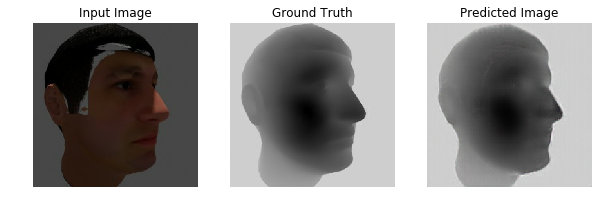

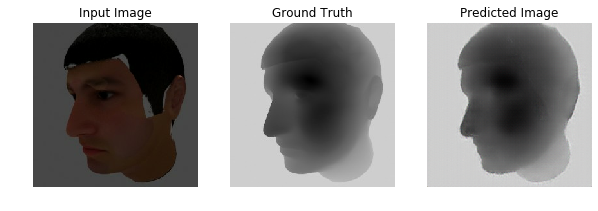

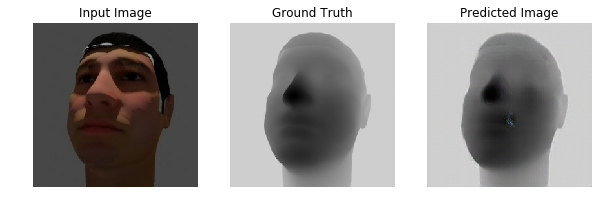

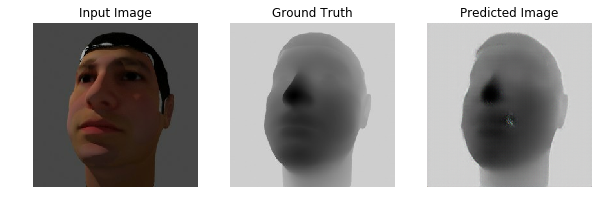

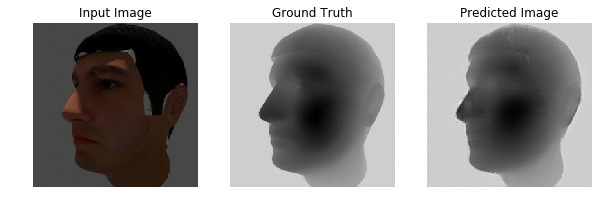

In [17]:
train(normal_data_list, 20)

In [50]:
checkpoint.restore(tf.train.latest_checkpoint(CKPATH)).assert_consumed()

ERROR:tensorflow:Couldn't match files for checkpoint /content/drive/My Drive/concurso/checkpoints/ckpt-1


AssertionError: ignored

In [18]:
#generate_images(generator, [test_list[2][0], no_data, no_data, no_data, no_data, no_data, no_data, no_data], test_list[2][1])

TRUEPATH = PATH + '/real'

trueurls = !ls -1 '{TRUEPATH}'
true_urls = np.copy(trueurls)

def load_true_img(filename):
  inimg = tf.cast(tf.image.decode_jpeg(tf.io.read_file(TRUEPATH + '/' + filename)), tf.float32)[...,:3]
  
  inimg = tf.image.resize(inimg, [IMG_HEIGHT, IMG_WIDTH])
  
    
  inimg= (inimg / 127.5) - 1
  
  return inimg

true_dataset = tf.data.Dataset.from_tensor_slices(true_urls)
true_dataset = true_dataset.map(load_true_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
true_dataset = true_dataset.batch(1)

true_list = []

for i in true_dataset:
  true_list.append(i)


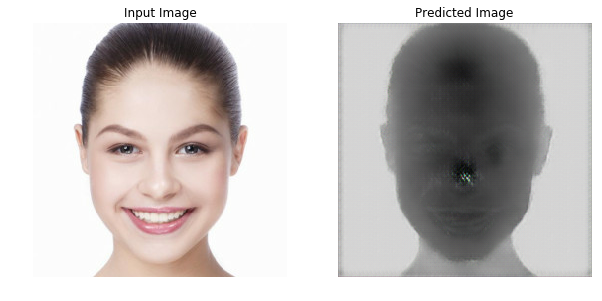

In [38]:
generate_true_images(generator, [true_list[2], no_data, no_data, no_data, no_data, no_data, no_data, no_data])